# **Galperin Conversion**

In this module we convert the Z,N,E output of a seismometer with Galperin topology, also known as _homogeneous triaxial arrangement_ and used i.e. in the STS-2 series and the Nanometrics Trillium family, back to the original U,V,W traces of the three internal sensors. It also gives the option to re-convert from U,V,W to Z,N,E. This module contains only the conversion matrix for the STS-2 and not for the Trillium family of instruments. It also should not be used with the output of seismometers with a classical topology, where the three internal sensor are orthogonally arranged along the cardinal directions Z,N,E (i.e. Guralp 3T or MBB-2).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import obspy 
from obspy import read, read_inventory
from obspy import UTCDateTime

Read file with stream to be converted

3 Trace(s) in Stream:
BK.BK73..HHE | 2020-08-18T20:29:59.998393Z - 2020-08-18T21:29:59.998393Z | 100.0 Hz, 360001 samples
BK.BK73..HHN | 2020-08-18T20:29:59.998393Z - 2020-08-18T21:29:59.998393Z | 100.0 Hz, 360001 samples
BK.BK73..HHZ | 2020-08-18T20:29:59.998393Z - 2020-08-18T21:29:59.998393Z | 100.0 Hz, 360001 samples


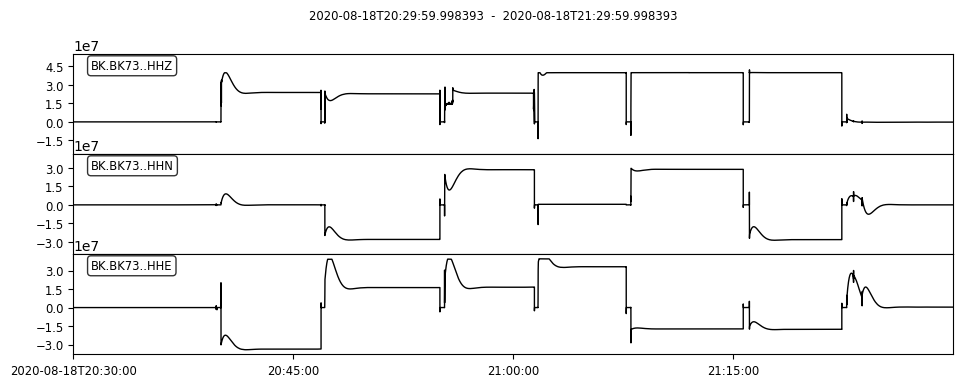

360001


In [2]:
str = read("./Instr Test/STS-2-Test")
print(str.__str__(extended=True))
#create overview plots full length of file
str.plot(color='black',size=(1000,400),equal_scale=True)
numpoints=(str[0].stats.npts)
print (numpoints)

Separate the data stream into three arrays containing the traces Z,N,E. Converting them into three different arrays containing the traces U,V,W

0.4082482904638631 1.7320508075688772 1.4142135623730951


C:\Sources-Utilities\Utilities\Anaconda-Python\lib\site-packages\IPython\core\pylabtools.py:122: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


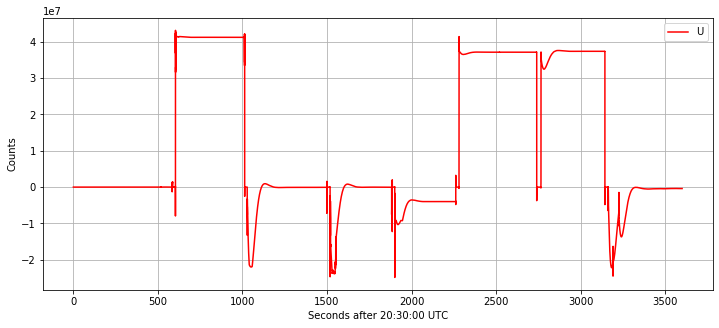

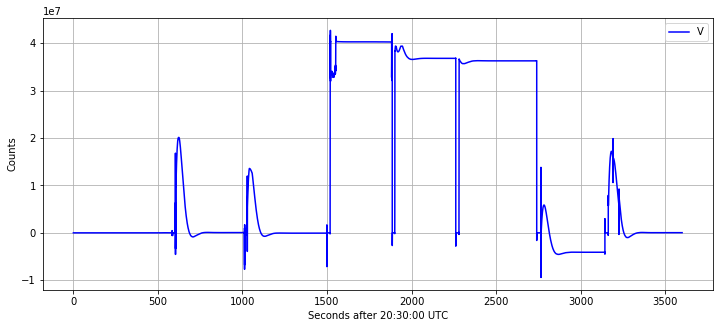

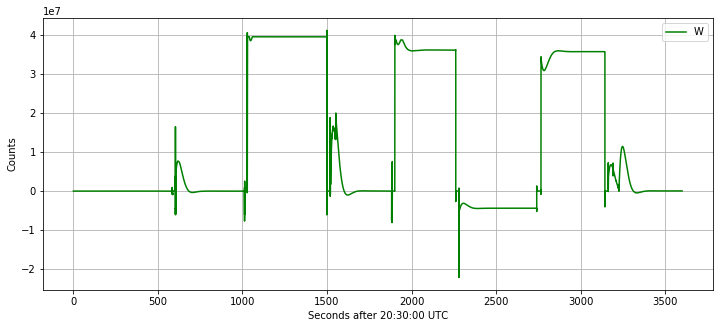

Wall time: 3.62 s


In [14]:
%%time

t=np.zeros(numpoints)
U=np.zeros(numpoints)
V=np.zeros(numpoints)
W=np.zeros(numpoints)

Z=str[2].data
N=str[1].data
E=str[0].data

#preparing the conversation matrix for STS-2 only
w6=np.sqrt(6)
w6=1/w6
w3=np.sqrt(3)
w2=np.sqrt(2)
print (w6,w3,w2)

for i in range (numpoints):
    t[i]=i/100
    U[i]= w6*(-2*E[i]+w2*Z[i])
    V[i]= w6*(E[i]+w3*N[i]+w2*Z[i])
    W[i]= w6*(E[i]-w3*N[i]+w2*Z[i])
            
#plotting the new traces U,V,W

plt.rcParams['figure.figsize'] = [12, 5]
plt.plot (t,U,color='r',label="U") 
plt.ylabel('Counts')
plt.xlabel("Seconds after 20:30:00 UTC")
plt.grid()
plt.legend()
plt.show()
plt.plot (t,V,color='b',label="V") 
plt.ylabel('Counts')
plt.xlabel("Seconds after 20:30:00 UTC")
plt.grid()
plt.legend()
plt.show()
plt.plot (t,W,color='g',label="W") 
plt.ylabel('Counts')
plt.xlabel("Seconds after 20:30:00 UTC")
plt.grid(which='both')
plt.legend()
plt.show()


Check if the conversion was done correctly by reconverting back to Z,N,E and plotting each trace on top of its original. Then compute the residual (Z-Z1 etc.) for each pair of traces

C:\Sources-Utilities\Utilities\Anaconda-Python\lib\site-packages\IPython\core\pylabtools.py:122: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


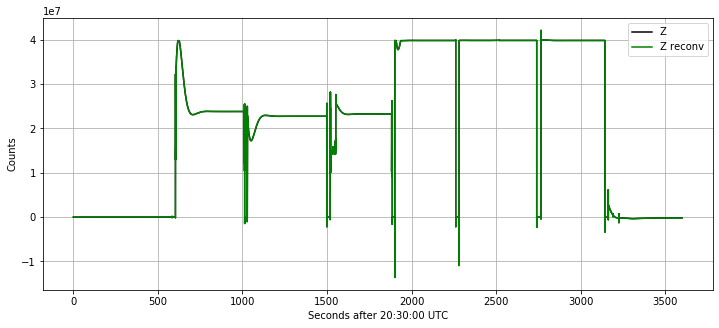

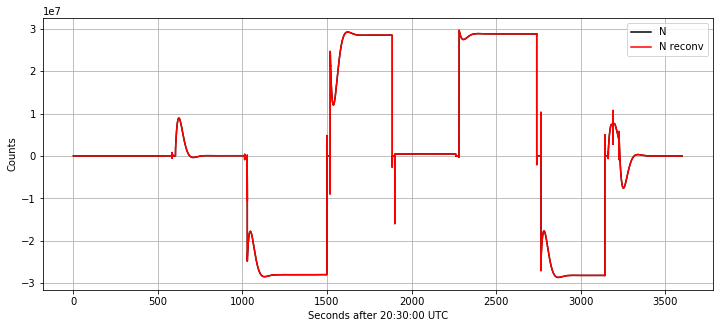

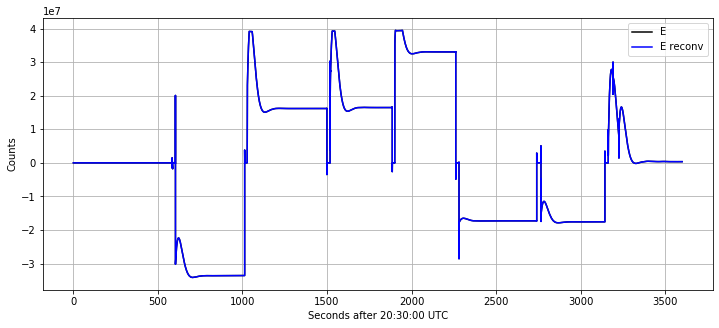

Wall time: 4.59 s


In [10]:
%%time

Z1=np.zeros(numpoints)
N1=np.zeros(numpoints)
E1=np.zeros(numpoints)
ZR=np.zeros(numpoints)
NR=np.zeros(numpoints)
ER=np.zeros(numpoints)

for i in range (numpoints):
    Z1[i]= w6*(w2*U[i]+w2*V[i]+w2*W[i])
    N1[i]= w6*(w3*V[i]-w3*W[i])
    E1[i]= w6*(-2*U[i]+V[i]+W[i])
    ZR[i]=abs(Z[i]-Z1[i])
    NR[i]=abs(N[i]-N1[i])
    ER[i]=abs(E[i]-E1[i])

plt.plot (t,Z,color='black',label="Z")
plt.plot (t,Z1,color='green',label="Z reconv") 
plt.ylabel('Counts')
plt.xlabel("Seconds after 20:30:00 UTC")
plt.grid()
plt.legend()
plt.show()
plt.plot (t,N,color='black',label="N")
plt.plot (t,N1,color='red',label="N reconv") 
plt.ylabel('Counts')
plt.xlabel("Seconds after 20:30:00 UTC")
plt.grid()
plt.legend()
plt.show()
plt.plot (t,E,color='black',label="E") 
plt.plot (t,E1,color='blue',label="E reconv") 
plt.ylabel('Counts')
plt.xlabel("Seconds after 20:30:00 UTC")
plt.grid()
plt.legend()
plt.show()

C:\Sources-Utilities\Utilities\Anaconda-Python\lib\site-packages\IPython\core\pylabtools.py:122: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


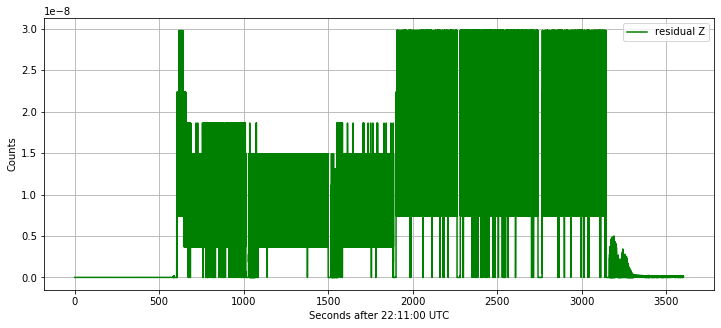

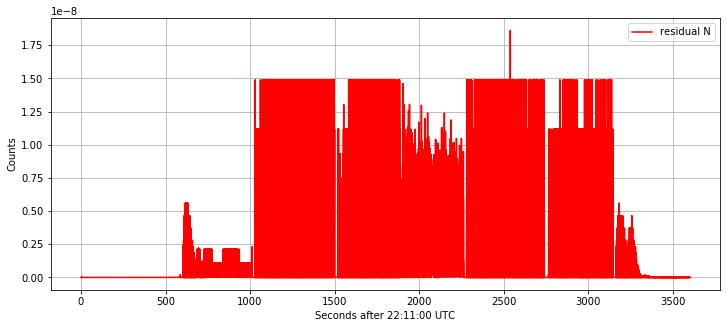

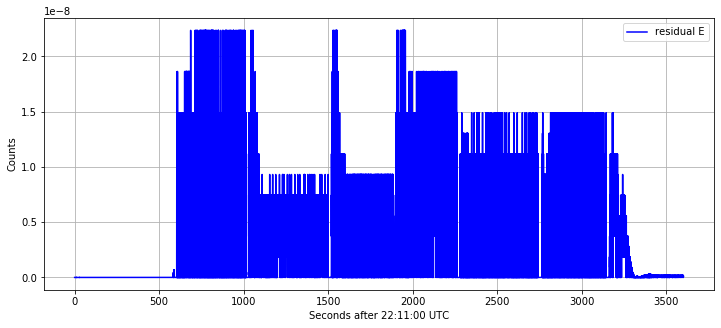

In [11]:
#plot residual

plt.plot (t,ZR,color='green',label="residual Z") 
plt.ylabel('Counts')
plt.xlabel("Seconds after 22:11:00 UTC")
plt.grid()
plt.legend()
plt.show()

plt.plot (t,NR,color='red',label="residual N") 
plt.ylabel('Counts')
plt.xlabel("Seconds after 22:11:00 UTC")
plt.grid()
plt.legend()
plt.show()
plt.plot (t,ER,color='blue',label="residual E")
plt.ylabel('Counts')
plt.xlabel("Seconds after 22:11:00 UTC")
plt.grid()
plt.legend()
plt.show()

How do Z,N,E look like when one of the U,V,W sensors is down, i.e. its boom is at one of the ends? 

Text(0.5, 1.0, 'U sensor is down')

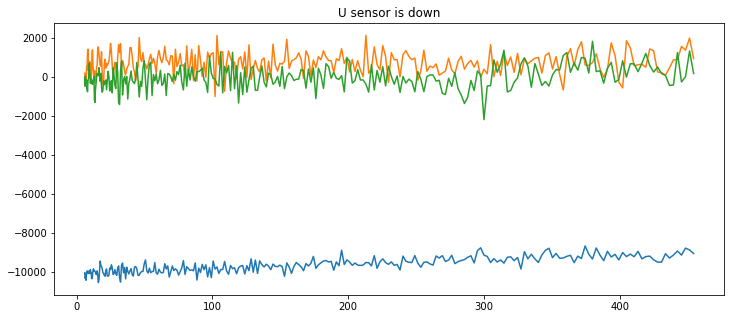

In [18]:
#select time window in sec
dt=300
Ztest=np.zeros(300)
Ntest=np.zeros(300)
Etest=np.zeros(300)
timetest=np.zeros(300)

udown=599
vdown=1549
wdown=1099

#selecting traces while U is down
for i in range (300):
    udown=udown+i
    Ztest[i]=Z[udown]
    Ntest[i]=N[udown]
    Etest[i]=E[udown]
    timetest[i]=t[udown]
plt.plot(timetest,Ztest)
plt.plot(timetest,Ntest)
plt.plot(timetest,Etest)
plt.title ("U sensor down")
    